<!-- Notebook title -->
# Title

# 1. Notebook Description

### 1.1 Task Description
<!-- 
- A brief description of the problem you're solving with machine learning.
- Define the objective (e.g., classification, regression, clustering, etc.).
-->

TODO

### 1.2 Useful Resources
<!--
- Links to relevant papers, articles, or documentation.
- Description of the datasets (if external).
-->

### 1.2.1 Data

#### 1.2.1.1 Common

* [Datasets Kaggle](https://www.kaggle.com/datasets)  
  &nbsp;&nbsp;&nbsp;&nbsp;A vast repository of datasets across various domains provided by Kaggle, a platform for data science competitions.
  
* [Toy datasets from Sklearn](https://scikit-learn.org/stable/datasets/toy_dataset.html)  
  &nbsp;&nbsp;&nbsp;&nbsp;A collection of small datasets that come with the Scikit-learn library, useful for quick prototyping and testing algorithms.
  
* [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)  
  &nbsp;&nbsp;&nbsp;&nbsp;A widely-used repository for machine learning datasets, with a variety of real-world datasets available for research and experimentation.
  
* [Google Dataset Search](https://datasetsearch.research.google.com/)  
  &nbsp;&nbsp;&nbsp;&nbsp;A tool from Google that helps to find datasets stored across the web, with a focus on publicly available data.
  
* [AWS Public Datasets](https://registry.opendata.aws/)  
  &nbsp;&nbsp;&nbsp;&nbsp;A registry of publicly available datasets that can be analyzed on the cloud using Amazon Web Services (AWS).
  
* [Microsoft Azure Open Datasets](https://azure.microsoft.com/en-us/services/open-datasets/)  
  &nbsp;&nbsp;&nbsp;&nbsp;A collection of curated datasets from various domains, made available by Microsoft Azure for use in machine learning and analytics.
  
* [Awesome Public Datasets](https://github.com/awesomedata/awesome-public-datasets)  
  &nbsp;&nbsp;&nbsp;&nbsp;A GitHub repository that lists a wide variety of datasets across different domains, curated by the community.
  
* [Data.gov](https://www.data.gov/)  
  &nbsp;&nbsp;&nbsp;&nbsp;A portal to the US government's open data, offering access to a wide range of datasets from various federal agencies.
  
* [Google BigQuery Public Datasets](https://cloud.google.com/bigquery/public-data)  
  &nbsp;&nbsp;&nbsp;&nbsp;Public datasets hosted by Google BigQuery, allowing for quick and powerful querying of large datasets in the cloud.
  
* [Papers with Code](https://paperswithcode.com/datasets)  
  &nbsp;&nbsp;&nbsp;&nbsp;A platform that links research papers with the corresponding code and datasets, helping researchers reproduce results and explore new data.
  
* [Zenodo](https://zenodo.org/)  
  &nbsp;&nbsp;&nbsp;&nbsp;An open-access repository that allows researchers to share datasets, software, and other research outputs, often linked to academic publications.
  
* [The World Bank Open Data](https://data.worldbank.org/)  
  &nbsp;&nbsp;&nbsp;&nbsp;A comprehensive source of global development data, with datasets covering various economic and social indicators.
  
* [OpenML](https://www.openml.org/)  
  &nbsp;&nbsp;&nbsp;&nbsp;An online platform for sharing datasets, machine learning experiments, and results, fostering collaboration in the ML community.
  
* [Stanford Large Network Dataset Collection (SNAP)](https://snap.stanford.edu/data/)  
  &nbsp;&nbsp;&nbsp;&nbsp;A collection of large-scale network datasets from Stanford University, useful for network analysis and graph-based machine learning.
  
* [KDnuggets Datasets](https://www.kdnuggets.com/datasets/index.html)  
  &nbsp;&nbsp;&nbsp;&nbsp;A curated list of datasets for data mining and data science, compiled by the KDnuggets community.


#### 1.2.1.2 Project

### 1.2.2 Learning

* [K-Nearest Neighbors on Kaggle](https://www.kaggle.com/code/mmdatainfo/k-nearest-neighbors)

* [Complete Guide to K-Nearest-Neighbors](https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor)

### 1.2.3 Documentation

---

# 2. Setup

## 2.1 Imports
<!--
- Import necessary libraries (e.g., `numpy`, `pandas`, `matplotlib`, `scikit-learn`, etc.).
-->

In [1]:
from ikt450.src.common_imports import *
from ikt450.src.config import get_paths
from ikt450.src.common_func import load_dataset, save_dataframe, ensure_dir_exists

import torch
import torchvision
import torchvision.transforms as transforms

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

## 2.2 Global Variables
<!--
- Define global constants, paths, and configuration settings used throughout the notebook.
-->

### 2.2.1 Paths

In [2]:
paths = get_paths()

### 2.2.3 Split ratio

In [3]:
SPLITRATIO = 0.8

In [4]:
paths

{'PATH_PROJECT_ROOT': 'C:\\Users\\jonin\\Documents\\ikt450\\ikt450',
 'PATH_ASSIGNMENTS': 'C:\\Users\\jonin\\Documents\\ikt450\\ikt450\\assignments',
 'PATH_COMMON': 'C:\\Users\\jonin\\Documents\\ikt450\\ikt450\\common',
 'PATH_COMMON_DATASETS': 'C:\\Users\\jonin\\Documents\\ikt450\\ikt450\\common\\datasets',
 'PATH_COMMON_NOTEBOOKS': 'C:\\Users\\jonin\\Documents\\ikt450\\ikt450\\common\\notebooks',
 'PATH_COMMON_RESOURCES': 'C:\\Users\\jonin\\Documents\\ikt450\\ikt450\\common\\resources',
 'PATH_COMMON_SCRIPTS': 'C:\\Users\\jonin\\Documents\\ikt450\\ikt450\\common\\scripts',
 'PATH_REPORTS': 'C:\\Users\\jonin\\Documents\\ikt450\\ikt450\\reports',
 'PATH_SRC': 'C:\\Users\\jonin\\Documents\\ikt450\\ikt450\\src',
 'PATH_1_KNN': 'C:\\Users\\jonin\\Documents\\ikt450\\ikt450\\assignments\\1_knn',
 'PATH_2_MLP': 'C:\\Users\\jonin\\Documents\\ikt450\\ikt450\\assignments\\2_mlp',
 'PATH_CNN': 'C:\\Users\\jonin\\Documents\\ikt450\\ikt450\\assignments\\CNN'}

In [5]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, ConcatDataset


In [6]:
# Load the dataset Food11 from PATH_COMMON_DATASETS/food11
# the folder structure is PATH_COMMON_DATASETS/food11/training and PATH_COMMON_DATASETS/food11/evaluation and PATH_COMMON_DATASETS/food11/validation
#  and in these folders there are 11 subfolders with the class names
#  and in these subfolders there are the images
#  the dataset is loaded with the torchvision.datasets.ImageFolder function
#  and the images are transformed to tensors and normalized


from torchvision import transforms
mean = [0.485, 0.456, 0.406]  # ImageNet mean
std = [0.229, 0.224, 0.225]   # ImageNet std






train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),        # Randomly crop the image to 224x224
    transforms.RandomHorizontalFlip(),        # Randomly flip the image horizontally
    transforms.RandomRotation(15),            # Randomly rotate the image by 15 degrees
    transforms.ColorJitter(                   # Randomly change brightness, contrast, saturation, and hue
        brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1
    ),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])

test_transform = transforms.Compose([
    transforms.Resize(256),                   # Resize the shorter side to 256 pixels
    transforms.CenterCrop(224),               # Crop the center 224x224 pixels
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])

transform = transforms.Compose(
[transforms.ToTensor(),
transforms.Resize((224, 224)),
transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


train_dataset = torchvision.datasets.ImageFolder(root=f"{paths['PATH_COMMON_DATASETS']}/food11/training" , transform=train_transform)
train_dataset
test_dataset = torchvision.datasets.ImageFolder(root=f"{paths['PATH_COMMON_DATASETS']}/food11/evaluation" , transform=test_transform)
test_dataset
val_dataset = torchvision.datasets.ImageFolder(root=f"{paths['PATH_COMMON_DATASETS']}/food11/validation" , transform=test_transform)
val_dataset

Dataset ImageFolder
    Number of datapoints: 3430
    Root location: C:\Users\jonin\Documents\ikt450\ikt450\common\datasets/food11/validation
    StandardTransform
Transform: Compose(
               Resize(size=256, interpolation=bilinear, max_size=None, antialias=True)
               CenterCrop(size=(224, 224))
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [7]:
# create data loader
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=6)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=False)


## 2.3 Function Definitions
<!--
- Define helper functions that will be used multiple times in the notebook.
- Consider organizing these into separate sections (e.g., data processing functions, model evaluation functions).
-->

---

# 4. Data Processing

---

# 5. Model Development

## 5.1 Model Selection
<!--
- Choose the model(s) to be trained (e.g., linear regression, decision trees, neural networks).
-->

In [35]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        
        # First convolutional layer (input channels=3 for RGB, output channels=6, kernel size=5)
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)
        
        # Second convolutional layer (input channels=6, output channels=16, kernel size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        
        # After two conv + pooling layers, the feature map size will be reduced.
        # For an input image of size 224x224, the final feature map size after conv and pooling is 53x53.
        # 16 * 53 * 53 = 44944 flattened features going into the first fully connected layer.
        self.fc1 = nn.Linear(16 * 53 * 53, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 11)  # Output layer for classification (e.g., 10 classes)

    def forward(self, x):
        # First convolution, ReLU, and max-pooling layer
        x = F.max_pool2d(F.relu(self.conv1(x)), kernel_size=2, stride=2)  # Output size: (6, 110, 110)
        
        # Second convolution, ReLU, and max-pooling layer
        x = F.max_pool2d(F.relu(self.conv2(x)), kernel_size=2, stride=2)  # Output size: (16, 53, 53)
        
        # Flatten the feature maps for the fully connected layers
        x = x.view(-1, 16 * 53 * 53)  # Reshape to (batch_size, 16 * 53 * 53)
        
        # Fully connected layers with ReLU activation
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        
        # Output layer (raw scores for classification)
        x = self.fc3(x)
        
        return x


## 5.2 Model Training
<!--
- Train the selected model(s) using the training data.
-->

In [36]:
model = LeNet()

model.to(device)
model
from torchsummary import summary


In [37]:

# define the loss function and the optimizer
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=0.003)

n_epochs = 50



In [ ]:
for epoch in range(n_epochs):
    running_loss = 0.0
    model.train()
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    model.eval()
    with torch.no_grad():
        val_loss = 0.0
        for i, data in enumerate(val_loader, 0):
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
    print(f"{epoch + 1} loss: {running_loss / len(train_loader)} val_loss: {val_loss / len(val_loader)}")

    running_loss = 0.0

1 loss: 2.3394027095782333 val_loss: 2.302468533869143


In [57]:
# evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,f1_score, precision_score, recall_score
val_loss = 0.0
val_labels = []
val_preds = []

model.eval()
with torch.no_grad():
    for data in val_loader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        val_loss += loss.item()

        _, preds = torch.max(outputs, 1)
        val_labels += labels.cpu().numpy().tolist()
        val_preds += preds.cpu().numpy().tolist()

print(f"Validation loss: {val_loss / len(val_loader)}")
print(f"Validation accuracy: {accuracy_score(val_labels, val_preds)}")
print(f"Validation f1: {f1_score(val_labels, val_preds, average='macro')}")
print(f"Validation precision: {precision_score(val_labels, val_preds, average='macro')}")
print(f"Validation recall: {recall_score(val_labels, val_preds, average='macro')}")
print(classification_report(val_labels, val_preds, target_names=train_dataset.classes,digits=4))


Validation loss: 1.357458922598097
Validation accuracy: 0.532069970845481
Validation f1: 0.5173994515701538
Validation precision: 0.5417242387535125
Validation recall: 0.5146409727623413
                 precision    recall  f1-score   support

          Bread     0.4272    0.4779    0.4511       362
  Dairy product     0.3253    0.1875    0.2379       144
        Dessert     0.4018    0.5480    0.4636       500
            Egg     0.3951    0.5413    0.4568       327
     Fried food     0.6318    0.3896    0.4820       326
           Meat     0.6507    0.3942    0.4910       449
  Noodles-Pasta     0.5562    0.6395    0.5949       147
           Rice     0.4951    0.5312    0.5126        96
        Seafood     0.5014    0.5303    0.5154       347
           Soup     0.7577    0.7880    0.7725       500
Vegetable-Fruit     0.8167    0.6336    0.7136       232

       accuracy                         0.5321      3430
      macro avg     0.5417    0.5146    0.5174      3430
   weighted a

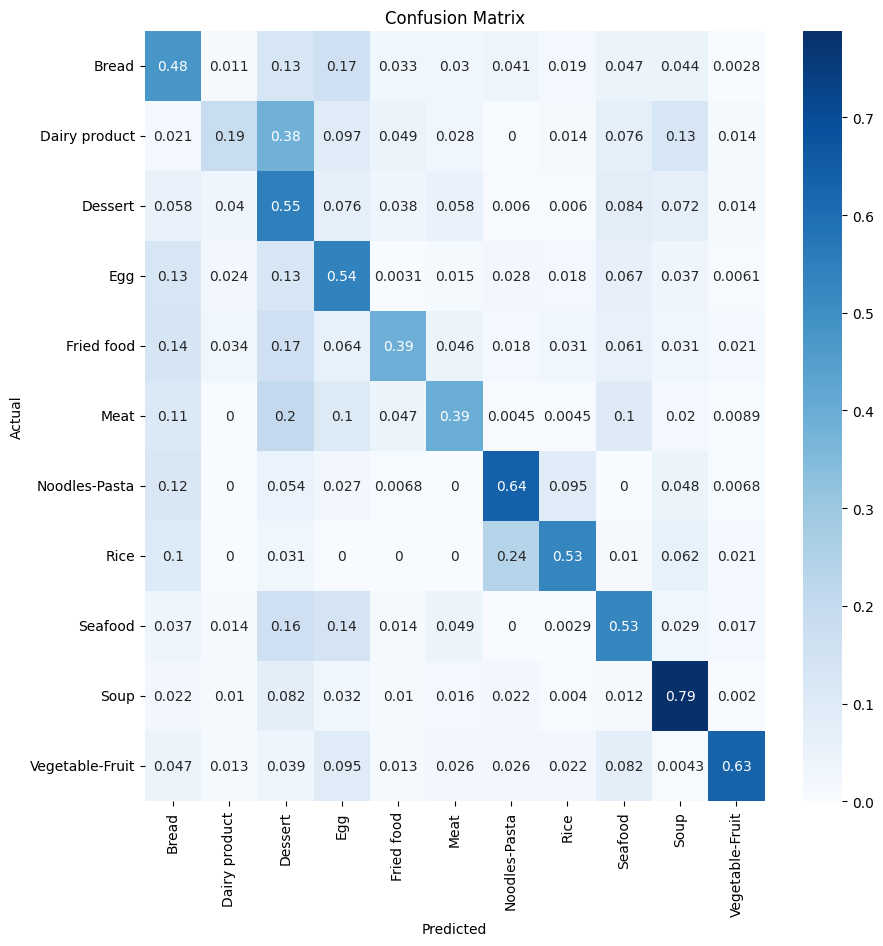

In [58]:
# plot the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(val_labels, val_preds, normalize='true')
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, xticklabels=train_dataset.classes, yticklabels=train_dataset.classes, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [27]:
# import resnet18
import torchvision.models as models
import torch
import torch.nn as nn
import torch.optim as optim
resnet18 = models.resnet34(weights=models.ResNet34_Weights.IMAGENET1K_V1)
resnet18.fc = nn.Linear(resnet18.fc.in_features, 11)

# Freeze all layers # resnet18 = models.resnet101(weights=models.ResNet101_Weights.IMAGENET1K_V1)
#for param in resnet18.parameters():
#    param.requires_grad = False

# Unfreeze the final fully connected layer
#for param in resnet18.fc.parameters():
#    param.requires_grad = True

resnet18.to(device)
resnet18

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet18.parameters(), lr=0.0005)
#lr_scheduler = optim.lr_scheduler.StepLR(optimizer,step_size=5, gamma=0.1)
n_epochs = 70

In [28]:
best_val_loss = float('inf')
best_model = None


for epoch in range(n_epochs):
    running_loss = 0.0
    resnet18.train()
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = resnet18(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

      #  lr_scheduler.step()
        running_loss += loss.item()
    resnet18.eval()
    with torch.no_grad():
        val_loss = 0.0
        for i, data in enumerate(val_loader, 0):
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = resnet18(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model = resnet18
    print(f"{epoch + 1} loss: {running_loss / len(train_loader)} val_loss: {val_loss / len(val_loader)}")


1 loss: 1.3795467528324683 val_loss: 1.0494444878013045
2 loss: 1.048400469968234 val_loss: 0.8413334848980109
3 loss: 0.9322930588884261 val_loss: 1.0196698620846425
4 loss: 0.8645120936304235 val_loss: 0.7414844162175777
5 loss: 0.8239529848484546 val_loss: 0.7369837639508424
6 loss: 0.7799644344832904 val_loss: 0.6131168642529735
7 loss: 0.770240188609435 val_loss: 0.6918771911619438
8 loss: 0.7219365292189577 val_loss: 0.6187744907758854
9 loss: 0.703184519095714 val_loss: 0.5611067606067216
10 loss: 0.6812290446561517 val_loss: 0.567461785480932
11 loss: 0.6573407485550661 val_loss: 0.6344342311775243
12 loss: 0.6343057534166139 val_loss: 0.5901004738967728
13 loss: 0.6216874658386299 val_loss: 0.5808183824022611
14 loss: 0.6105038126309713 val_loss: 0.6099981229614329
15 loss: 0.5920978685220083 val_loss: 0.5119821939755369
16 loss: 0.5848904239031875 val_loss: 0.5099541282074319
17 loss: 0.5635995430853761 val_loss: 0.5073679967059029
18 loss: 0.5584734180116345 val_loss: 0.5216

KeyboardInterrupt: 

In [29]:

resnet18 = best_model   

In [32]:
# evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,f1_score, precision_score, recall_score
val_loss = 0.0
val_labels = []
val_preds = []

resnet18.eval()
with torch.no_grad():
    for data in val_loader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = resnet18(inputs)
        loss = criterion(outputs, labels)
        val_loss += loss.item()

        _, preds = torch.max(outputs, 1)
        val_labels += labels.cpu().numpy().tolist()
        val_preds += preds.cpu().numpy().tolist()

print(f"Validation loss: {val_loss / len(val_loader)}")
print(f"Validation accuracy: {accuracy_score(val_labels, val_preds)}")
print(f"Validation f1: {f1_score(val_labels, val_preds, average='macro')}")
print(f"Validation precision: {precision_score(val_labels, val_preds, average='macro')}")
print(f"Validation recall: {recall_score(val_labels, val_preds, average='macro')}")
print(classification_report(val_labels, val_preds, target_names=train_dataset.classes,digits=4))


Validation loss: 0.365063465476312
Validation accuracy: 0.8879593665969525
Validation f1: 0.8964643039761767
Validation precision: 0.8964999846809754
Validation recall: 0.8984251504577181
                 precision    recall  f1-score   support

          Bread     0.8534    0.7908    0.8209       368
  Dairy product     0.8228    0.8784    0.8497       148
        Dessert     0.8481    0.8040    0.8255       500
            Egg     0.8058    0.9164    0.8575       335
     Fried food     0.8601    0.8571    0.8586       287
           Meat     0.9490    0.8611    0.9029       432
  Noodles-Pasta     0.9730    0.9796    0.9763       147
           Rice     1.0000    0.9375    0.9677        96
        Seafood     0.8593    0.9274    0.8921       303
           Soup     0.9458    0.9780    0.9617       500
Vegetable-Fruit     0.9442    0.9524    0.9483       231

       accuracy                         0.8880      3347
      macro avg     0.8965    0.8984    0.8965      3347
   weighted 

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x0000027220B54400>
Traceback (most recent call last):
  File "c:\Users\jonin\.conda\envs\pytorch_24\Lib\site-packages\torch\utils\data\dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "c:\Users\jonin\.conda\envs\pytorch_24\Lib\site-packages\torch\utils\data\dataloader.py", line 1562, in _shutdown_workers
    if self._persistent_workers or self._workers_status[worker_id]:
                                   ^^^^^^^^^^^^^^^^^^^^
AttributeError: '_MultiProcessingDataLoaderIter' object has no attribute '_workers_status'


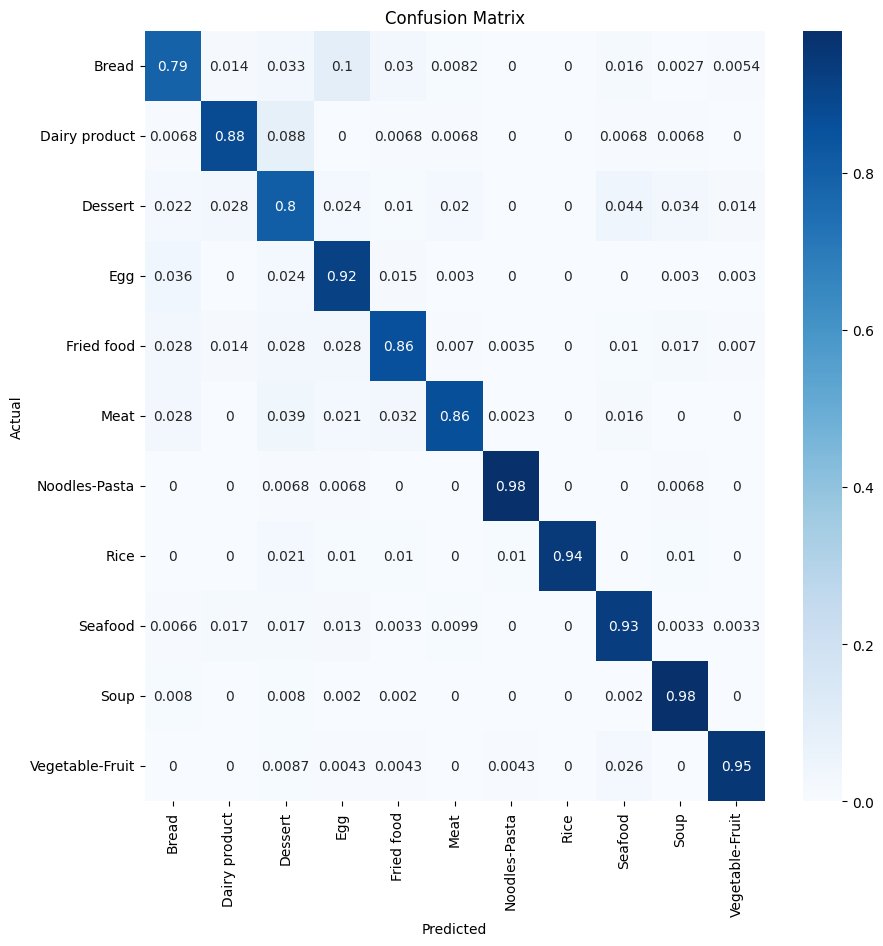

In [33]:
# plot the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(val_labels, val_preds, normalize='true')
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, xticklabels=train_dataset.classes, yticklabels=train_dataset.classes, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## 5.3 Model Evaluation
<!--
- Evaluate model performance on validation data.
- Use appropriate metrics (e.g., accuracy, precision, recall, RMSE).
-->

## 5.4 Hyperparameter Tuning
<!--
- Fine-tune the model using techniques like Grid Search or Random Search.
- Evaluate the impact of different hyperparameters.
-->

## 5.5 Model Testing
<!--
- Evaluate the final model on the test dataset.
- Ensure that the model generalizes well to unseen data.
-->

## 5.6 Model Interpretation (Optional)
<!--
- Interpret the model results (e.g., feature importance, SHAP values).
- Discuss the strengths and limitations of the model.
-->

---

# 6. Predictions


## 6.1 Make Predictions
<!--
- Use the trained model to make predictions on new/unseen data.
-->

## 6.2 Save Model and Results
<!--
- Save the trained model to disk for future use.
- Export prediction results for further analysis.
-->

---

# 7. Documentation and Reporting

## 7.1 Summary of Findings
<!--
- Summarize the results and findings of the analysis.
-->

## 7.2 Next Steps
<!--
- Suggest further improvements, alternative models, or future work.
-->

## 7.3 References
<!--
- Cite any resources, papers, or documentation used.
-->